In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_dir = '/content/drive/MyDrive/brain_tumor/Training/'
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

In [ ]:
img_size = 128
image_array = cv2.resize(img_array, (img_size,img_size))

In [ ]:
gt1 = cv2.imread('/content/drive/MyDrive/brain_tumor/Training/Training/glioma_tumor/gg (1).jpg')
mt1 = cv2.imread('/content/drive/MyDrive/brain_tumor/Training/Training/meningioma_tumor/m (10).jpg')
nt1 = cv2.imread('/content/drive/MyDrive/brain_tumor/Training/Training/no_tumor/1.jpg')
pt1 = cv2.imread('/content/drive/MyDrive/brain_tumor/Training/Training/pituitary_tumor/p (151).jpg')

In [ ]:
train_data = []

for i in categories:
    train_path = os.path.join(data_dir,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_data.append([new_image_array , tag])
        except Exception as e:
            pass

In [ ]:
X = []
y = []
for i,j in train_data:
    X.append(i)
    y.append(j)
X = np.array(X).reshape(-1,img_size,img_size)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,128,128,1)

(2890, 128, 128)


In [ ]:
from keras.utils.np_utils import to_categorical   

y_enc = to_categorical(y, num_classes = 4)

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X , y_enc , test_size = 0.1, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train , y_train , test_size = 0.1, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

model = Sequential()


model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation = "softmax"))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 20

es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience = 3
)

batch_size = 16
imggen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)

In [ ]:
imggen.fit(X_train)
history = model.fit_generator(imggen.flow(X_train,y_train,batch_size = batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              callbacks = [es])    

Epoch 1/20
146/146 [==============================] - 202s 1s/step - loss: 1.2002 - accuracy: 0.4492 - val_loss: 1.0970 - val_accuracy: 0.5326
Epoch 2/20
146/146 [==============================] - 190s 1s/step - loss: 0.8247 - accuracy: 0.6429 - val_loss: 0.7667 - val_accuracy: 0.6245
Epoch 3/20
146/146 [==============================] - 191s 1s/step - loss: 0.7521 - accuracy: 0.6764 - val_loss: 0.6477 - val_accuracy: 0.7165
Epoch 4/20
146/146 [==============================] - 191s 1s/step - loss: 0.6891 - accuracy: 0.6988 - val_loss: 0.6183 - val_accuracy: 0.7088
Epoch 5/20
146/146 [==============================] - 190s 1s/step - loss: 0.5887 - accuracy: 0.7380 - val_loss: 0.5682 - val_accuracy: 0.7548
Epoch 6/20
146/146 [==============================] - 198s 1s/step - loss: 0.5355 - accuracy: 0.7818 - val_loss: 0.6069 - val_accuracy: 0.7203
Epoch 7/20
146/146 [==============================] - 199s 1s/step - loss: 0.4695 - accuracy: 0.8090 - val_loss: 0.5009 - val_accuracy: 0.7701

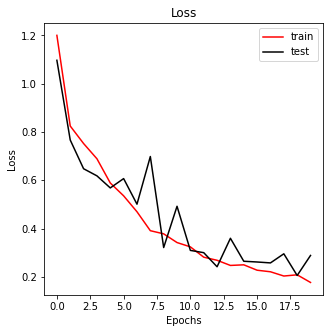

In [ ]:
plt.plot(history.history["loss"],c = "red")
plt.plot(history.history["val_loss"],c = "black")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

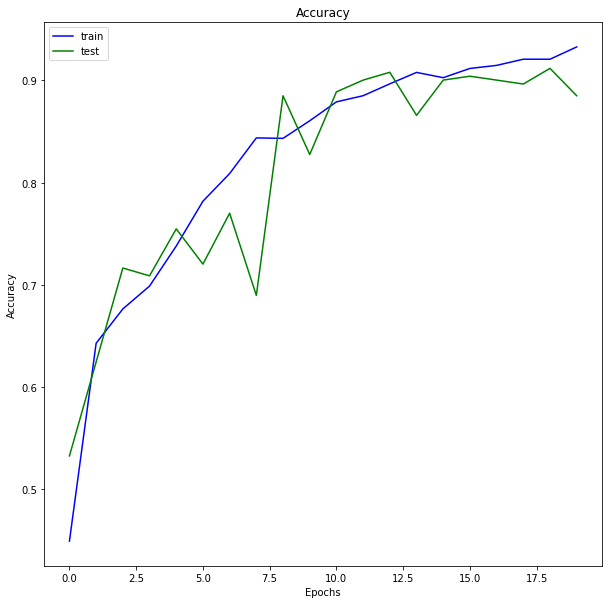

In [ ]:
plt.plot(history.history["accuracy"],c = "blue")
plt.plot(history.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (50,50)
plt.legend(["train", "test"])

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
score[1]

0.9169549942016602

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test_new,pred, target_names=categories))

                  precision    recall  f1-score   support

    glioma_tumor       0.92      0.95      0.93        80
meningioma_tumor       0.86      0.85      0.85        78
        no_tumor       0.91      0.89      0.90        47
 pituitary_tumor       0.98      0.96      0.97        84

        accuracy                           0.92       289
       macro avg       0.92      0.91      0.91       289
    weighted avg       0.92      0.92      0.92       289



In [ ]:
train_pred = model.predict(X_train)
train_pred = np.argmax(train_pred, axis=1)
Y_train_ = np.argmax(y_train, axis=1)
print("Accuracy on training set: {:.2f}%".format(np.sum(train_pred==Y_train_)/len(Y_train_)*100))

Accuracy on training set: 95.51%


In [ ]:
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)
Y_test_ = np.argmax(y_test, axis=1)
print("Accuracy on testing set: {:.2f}%".format(np.sum(test_pred==Y_test_)/len(Y_test_)*100))

Accuracy on testing set: 91.70%


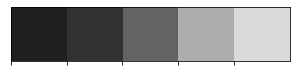

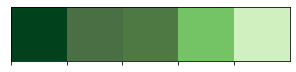

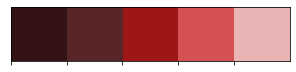

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

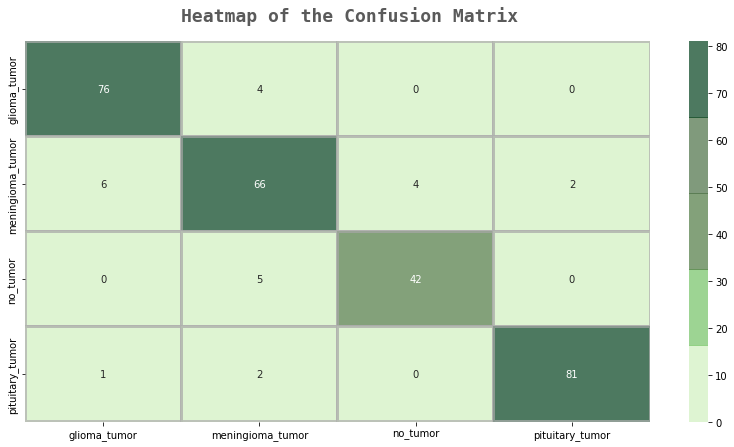

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=categories,yticklabels=categories,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]  
    
    if p==0:
        p='Pituitary Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Glioma Tumor'
    else:
        p='Meningioma Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])